# Movies EDA

Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [185]:
# Import necessary libraries

import json
from collections import Counter, defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
# Load the movies dataset
try:
    movies_df = pd.read_csv("movies.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'movies.csv' was not found.")
    movies_df = pd.DataFrame()

# Display the first few rows of the DataFrame if it is not empty
if not movies_df.empty:
    display(movies_df.head())
else:
    print("DataFrame is empty. Please check the file path and try again.")


Dataset loaded successfully!


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [187]:
# Remove redundant or unnecessary columns
columns_to_drop = [
    'homepage', 'keywords', 'original_language', 'original_title', 
    'overview', 'production_companies', 'status', 'tagline'
]
movies_df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the transformed DataFrame
print("Transformed DataFrame:")
display(movies_df.head())


Transformed DataFrame:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [188]:
# Number of rows before removing duplicates
initial_row_count = movies_df.shape[0]
print(f"Number of rows before removing duplicates: {initial_row_count}")

# Identify and display the first 10 duplicate rows based on the 'title' column
duplicates = movies_df[movies_df.duplicated(subset='title', keep=False)]
print("Displaying the first 10 duplicate rows based on the 'title' column:")
display(duplicates.head(10))

# Drop duplicate rows based on the 'title' column, keeping only the first occurrence
movies_df_no_duplicates = movies_df.drop_duplicates(subset='title', keep='first')

# Display the first 5 rows of the DataFrame after duplicates have been removed
print("\nDisplaying the first 5 rows of the DataFrame after removing duplicates:")
display(movies_df_no_duplicates.head())

# Number of rows after removing duplicates
final_row_count = movies_df_no_duplicates.shape[0]
print(f"Number of rows after removing duplicates: {final_row_count}")


Number of rows before removing duplicates: 4803
Displaying the first 10 duplicate rows based on the 'title' column:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,42.933027,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Host,6.0,1817
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,44.104469,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Batman,7.0,2096
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",The Host,6.7,537
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,0.679351,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203



Displaying the first 5 rows of the DataFrame after removing duplicates:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


Number of rows after removing duplicates: 4800


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [189]:
# Display the first 5 rows of movies with zero budget or zero revenue
print("\nMovies with zero budget:")
display(movies_df[movies_df['budget'] == 0].head())

print("\nMovies with zero revenue:")
display(movies_df[movies_df['revenue'] == 0].head())

# Drop rows where 'budget' or 'revenue' is 0
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

# Display the first 5 rows after dropping movies with zero budget or revenue
print("\nMovies after dropping those with zero budget or revenue:")
display(movies_df.head())



Movies with zero budget:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,18.251129,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Cat in the Hat,4.9,366
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,16.460356,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Campaign,5.6,578
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",258509,27.867368,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-12-17,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Alvin and the Chipmunks: The Road Chip,5.8,428
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",51052,19.836830,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-02-22,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Arthur Christmas,6.7,333
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",16858,5.159407,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1979-12-20,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All That Jazz,7.3,85



Movies with zero revenue:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,2.418535,"[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,21.214571,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,18.251129,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",10214,17.815595,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",10357,19.836124,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Volcano,5.2,376



Movies after dropping those with zero budget or revenue:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [190]:
# Convert the 'release_date' column to DateTime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Display the first 5 rows to check the conversion
print("\nFirst 5 rows after converting 'release_date' to DateTime:")
display(movies_df.head())

# Extract the release year and create a new column 'release_year'
movies_df['release_year'] = movies_df['release_date'].dt.year

# Display the first 5 rows to verify the addition of 'release_year' column
print("\nFirst 5 rows with the 'release_year' column added:")
display(movies_df.head())



First 5 rows after converting 'release_date' to DateTime:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124



First 5 rows with the 'release_year' column added:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [191]:
# Display the data types of all columns
print("\nData types of all columns:")
print(movies_df.dtypes)

# Convert 'budget' and 'revenue' columns to int64
movies_df['budget'] = movies_df['budget'].astype('int64', errors='ignore')
movies_df['revenue'] = movies_df['revenue'].astype('int64', errors='ignore')

# Display the first 5 rows to verify the conversion
print("\nFirst 5 rows after converting 'budget' and 'revenue' to int64:")
display(movies_df.head())



Data types of all columns:
budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int32
dtype: object

First 5 rows after converting 'budget' and 'revenue' to int64:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [192]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [193]:
# Inspect flattened data
movies_df.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [194]:
# Create a DataFrame with all movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action', na=False)]

# Display the first 5 rows of the Action movies DataFrame
print("\nFirst 5 rows of the Action movies DataFrame:")
display(action_movies.head())



First 5 rows of the Action movies DataFrame:


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

##### Note: I have done some research that indicates a low budget movie in Hollywood starts at $5 million. Therefore I have used $5 million as the threshold to filter out unrealistic entries and to make the visualization more useful. 


Most expensive and filtered cheapest movies:


,title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
3571,Dallas Buyers Club,5000000,55198285
3591,Nighthawks,5000000,19905359
3592,Friday the 13th Part VIII: Jason Takes Manhattan,5000000,14000000
3593,My Big Fat Greek Wedding,5000000,368744044
3594,Spring Breakers,5000000,31724284


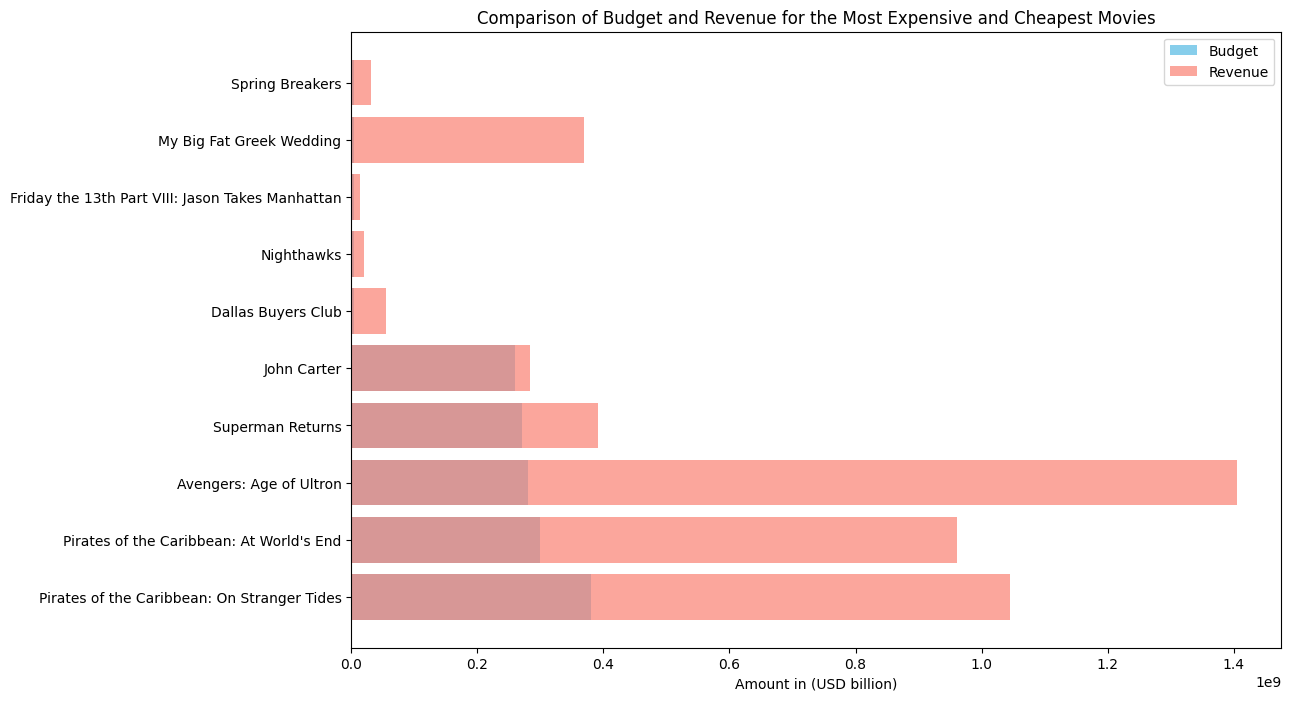

In [195]:
# Set a minimum budget threshold to filter out unrealistic entries
min_budget_threshold = 5000000

# Filter the DataFrame to exclude movies with a budget below the threshold
movies_df_filtered = movies_df[movies_df['budget'] >= min_budget_threshold]

# Find the 5 most expensive movies by budget
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False).head()

# Find the 5 cheapest movies using the filtered DataFrame
cheapest_movies_filtered = movies_df_filtered.sort_values(by='budget').head()

# Combine the most expensive and filtered cheapest movies for comparison
combined_movies_filtered = pd.concat([most_expensive_movies, cheapest_movies_filtered])

# Display the filtered combined DataFrame
print("\nMost expensive and filtered cheapest movies:")
display(combined_movies_filtered[['title', 'budget', 'revenue']])

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot budget
plt.barh(combined_movies_filtered['title'], combined_movies_filtered['budget'], color='skyblue', label='Budget')

# Plot revenue on the same graph
plt.barh(combined_movies_filtered['title'], combined_movies_filtered['revenue'], color='salmon', label='Revenue', alpha=0.7)

# Add labels and title
plt.xlabel('Amount in (USD billion)')
plt.title('Comparison of Budget and Revenue for the Most Expensive and Cheapest Movies')
plt.legend()

# Show the plot
plt.show()


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

Top 5 Most Profitable Movies:
             title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910

Bottom 5 Least Profitable Movies:
                            title     profit
13                The Lone Ranger -165710090
338                     The Alamo -119180039
141               Mars Needs Moms -111007242
208              The 13th Warrior  -98301101
311  The Adventures of Pluto Nash  -92896027

Combined Movies for Visualization:
                            title      profit
0                          Avatar  2550965087
25                        Titanic  1645034188
28                 Jurassic World  1363528810
44                      Furious 7  1316249360
16                   The Avengers  1299557910
13                The Lone Ranger  -165710090
338                     The Alamo  -119180039
141               Mars Needs Moms  -111007242
208              The 13th War

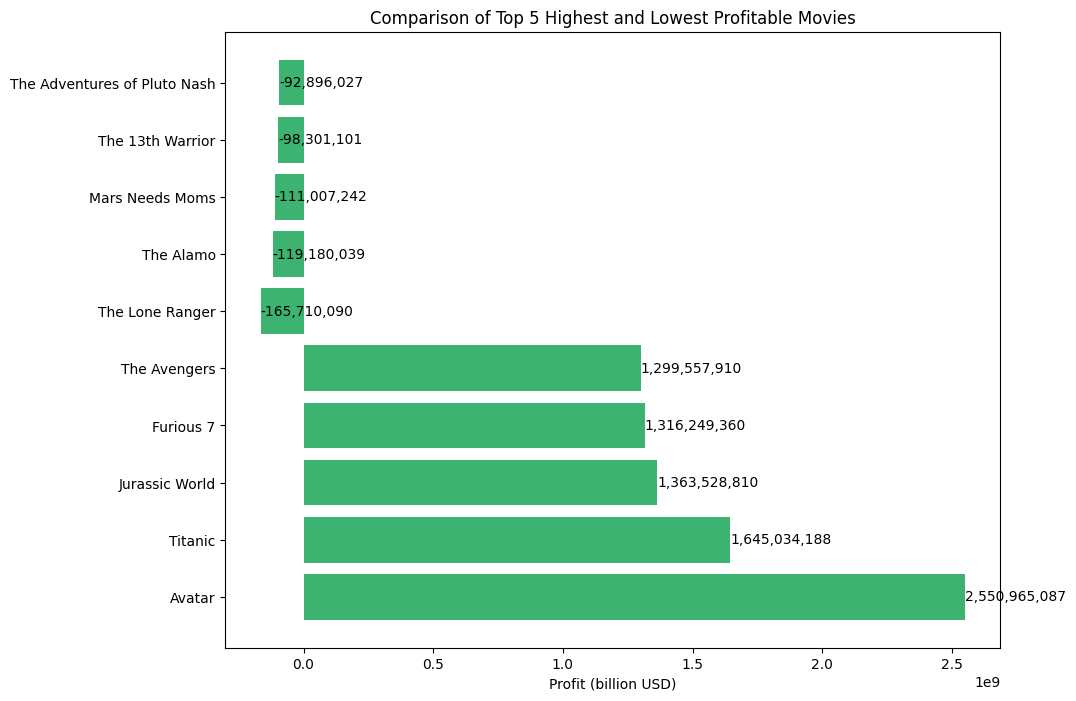

In [196]:
# Calculate profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Get the top 5 most profitable movies
top_profitable_movies = movies_df.nlargest(5, 'profit')
print("Top 5 Most Profitable Movies:")
print(top_profitable_movies[['title', 'profit']])

# Get the bottom 5 least profitable movies
bottom_profitable_movies = movies_df.nsmallest(5, 'profit')
print("\nBottom 5 Least Profitable Movies:")
print(bottom_profitable_movies[['title', 'profit']])

# Combine the top and bottom profitable movies
combined_movies = pd.concat([top_profitable_movies, bottom_profitable_movies])

# Display the combined movies
print("\nCombined Movies for Visualization:")
print(combined_movies[['title', 'profit']])

# Plotting the profits
plt.figure(figsize=(10, 8))
plt.barh(combined_movies['title'], combined_movies['profit'], color="mediumseagreen")
plt.xlabel('Profit (billion USD)')
plt.title('Comparison of Top 5 Highest and Lowest Profitable Movies')

# Annotate bars with profit values
for index, value in enumerate(combined_movies['profit']):
    plt.text(value, index, f'{value:,}', va='center')

plt.show()


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

Top 10 Most Popular Movies:
                                                 title  popularity
546                                            Minions  875.581305
95                                        Interstellar  724.247784
788                                           Deadpool  514.569956
94                             Guardians of the Galaxy  481.098624
127                                 Mad Max: Fury Road  434.278564
28                                      Jurassic World  418.708552
199  Pirates of the Caribbean: The Curse of the Bla...  271.972889
82                      Dawn of the Planet of the Apes  243.791743
200              The Hunger Games: Mockingjay - Part 1  206.227151
88                                          Big Hero 6  203.734590


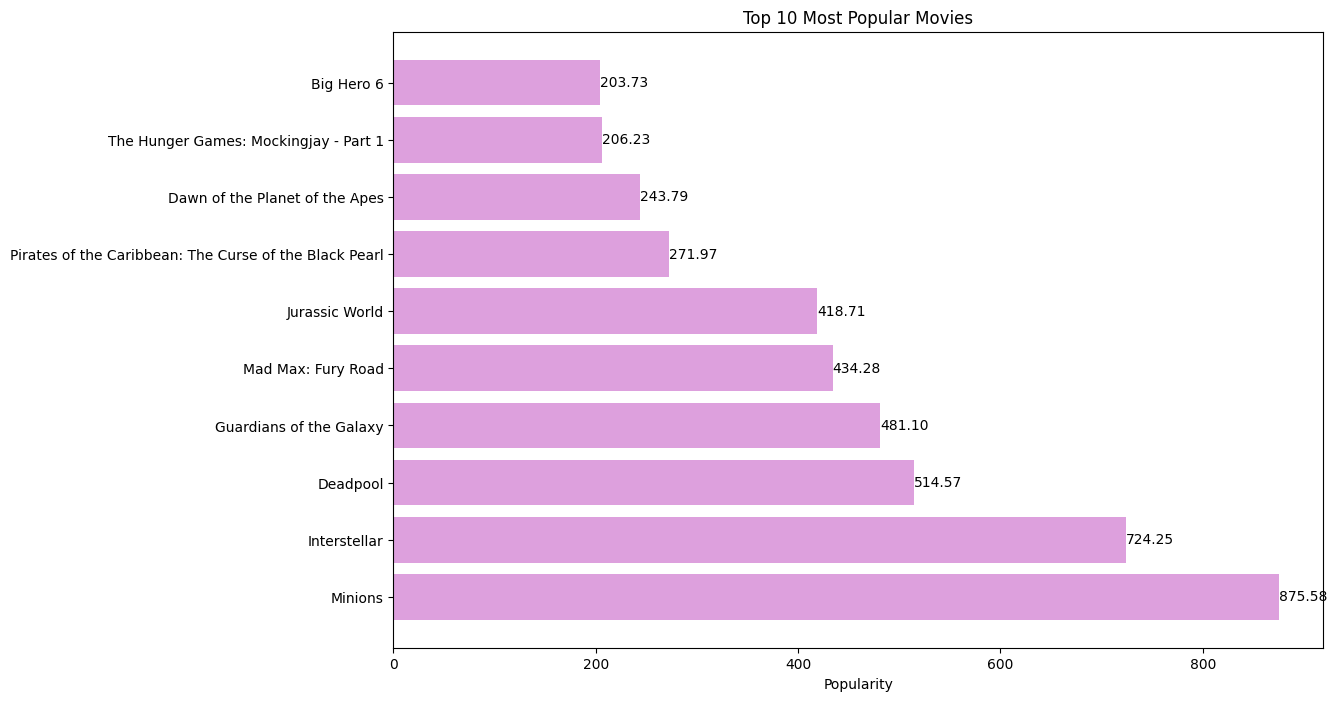

In [197]:
# Get the top 10 most popular movies
top_popular_movies = movies_df.nlargest(10, 'popularity')

# Display the top 10 most popular movies
print("Top 10 Most Popular Movies:")
print(top_popular_movies[['title', 'popularity']])

# Plotting the popularity
plt.figure(figsize=(12, 8))
plt.barh(top_popular_movies['title'], top_popular_movies['popularity'], color='plum')
plt.xlabel('Popularity')
plt.title('Top 10 Most Popular Movies')

# Annotate with popularity values
for index, value in enumerate(top_popular_movies['popularity']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()


#### Find Movies which are rated above 7

In [198]:
# Count the total number of movies
total_movies = movies_df.shape[0]

# Count the number of movies rated above 7
movies_above_7 = movies_df[movies_df['vote_average'] > 7].shape[0]

# Display the result
print(f"There are {movies_above_7} out of {total_movies} movies rated above 7.")


There are 637 out of 3229 movies rated above 7.


Sample of Movies Rated Above 7:
                                                  title  vote_average
2177                                      Reign Over Me           7.1
4281                                            Rebecca           7.7
380                                      Cinderella Man           7.3
3420                                    Boyz n the Hood           7.4
89                                       Wreck-It Ralph           7.1
4704                                               Once           7.3
262   The Lord of the Rings: The Fellowship of the Ring           8.0
2511                                         Home Alone           7.1
1987                               Howl's Moving Castle           8.2
3701                                Requiem for a Dream           7.9
3728                                        Whale Rider           7.1
2727                              Good Morning, Vietnam           7.1
3232                                       Pulp Fiction   

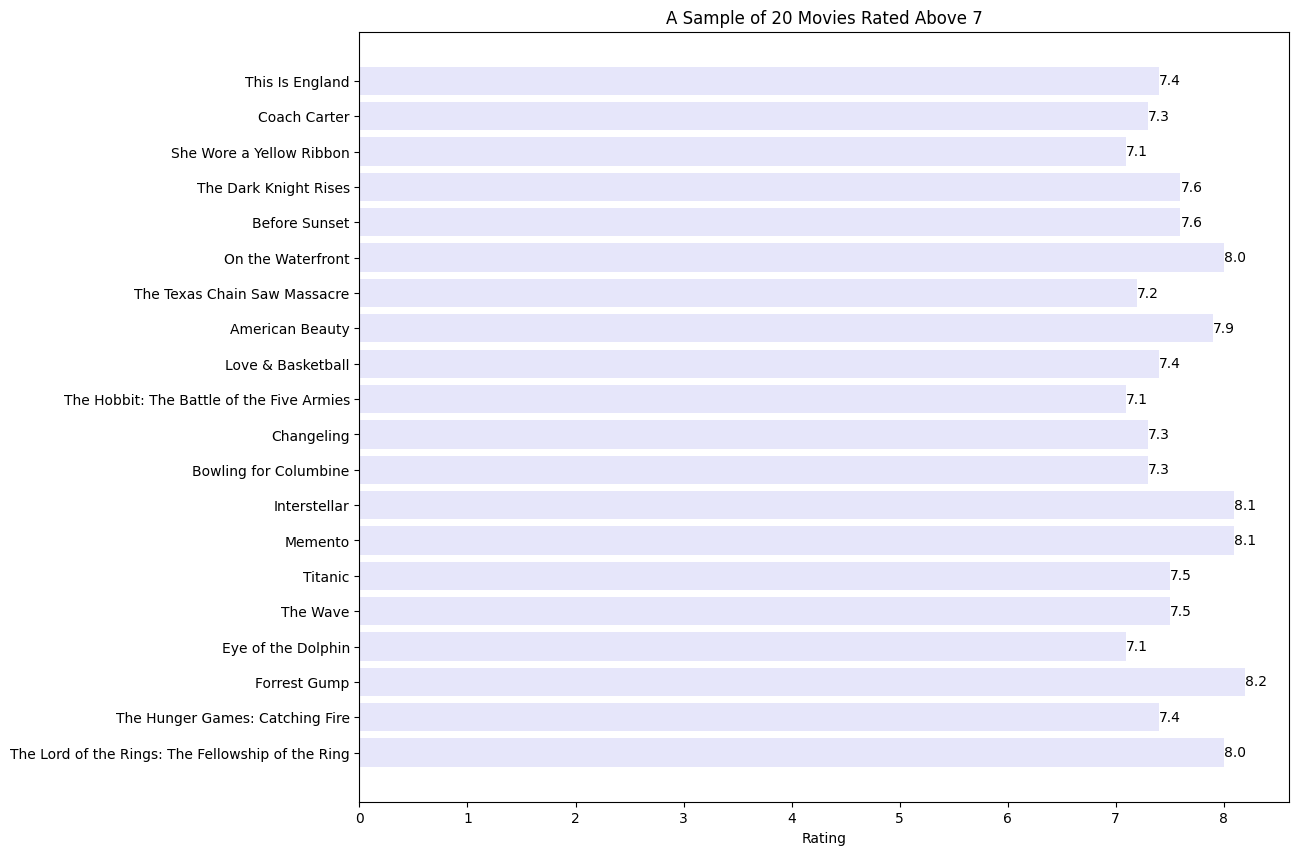

In [199]:
# Filter and sort movies with a rating above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7].sort_values(by='vote_average', ascending=False)

# Display a sample of 20 movies rated above 7
print("Sample of Movies Rated Above 7:")
print(highly_rated_movies[['title', 'vote_average']].sample(20))

# Select a sample of 20 movies for visualization
sampled_movies = highly_rated_movies.sample(20)

# Plotting the ratings
plt.figure(figsize=(12, 10))
plt.barh(sampled_movies['title'], sampled_movies['vote_average'], color='lavender')
plt.xlabel('Rating')
plt.title('A Sample of 20 Movies Rated Above 7')

# Annotate with rating values
for index, value in enumerate(sampled_movies['vote_average']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.show()


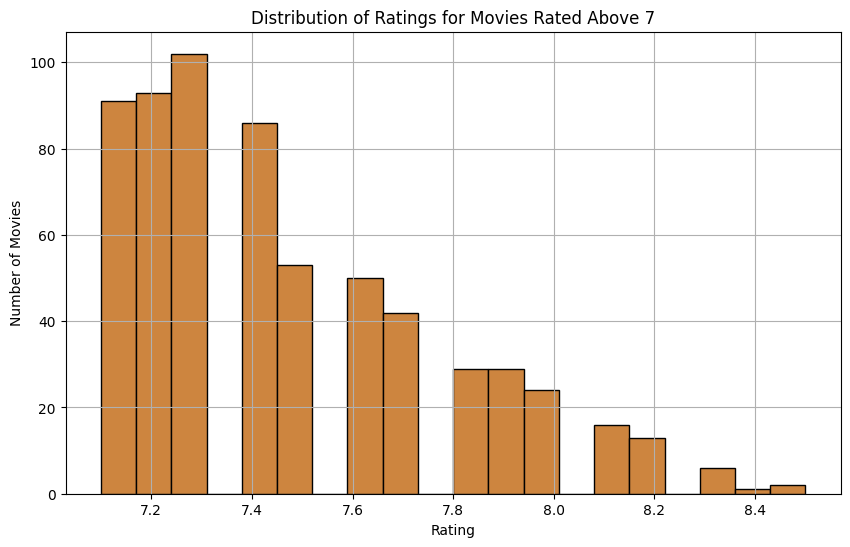

In [200]:
# Plotting the histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(highly_rated_movies['vote_average'], bins=20, color='peru', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Ratings for Movies Rated Above 7')
plt.grid(True)
plt.show()


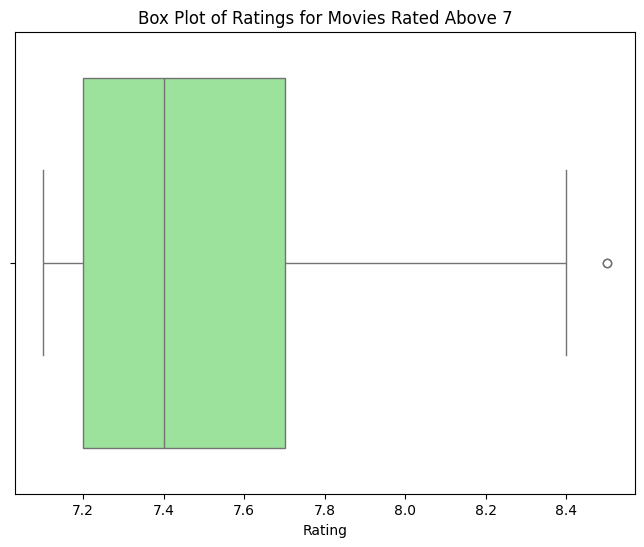

In [201]:
# Plotting the box plot of ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='vote_average', data=highly_rated_movies, color='lightgreen')
plt.xlabel('Rating')
plt.title('Box Plot of Ratings for Movies Rated Above 7')
plt.show()


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

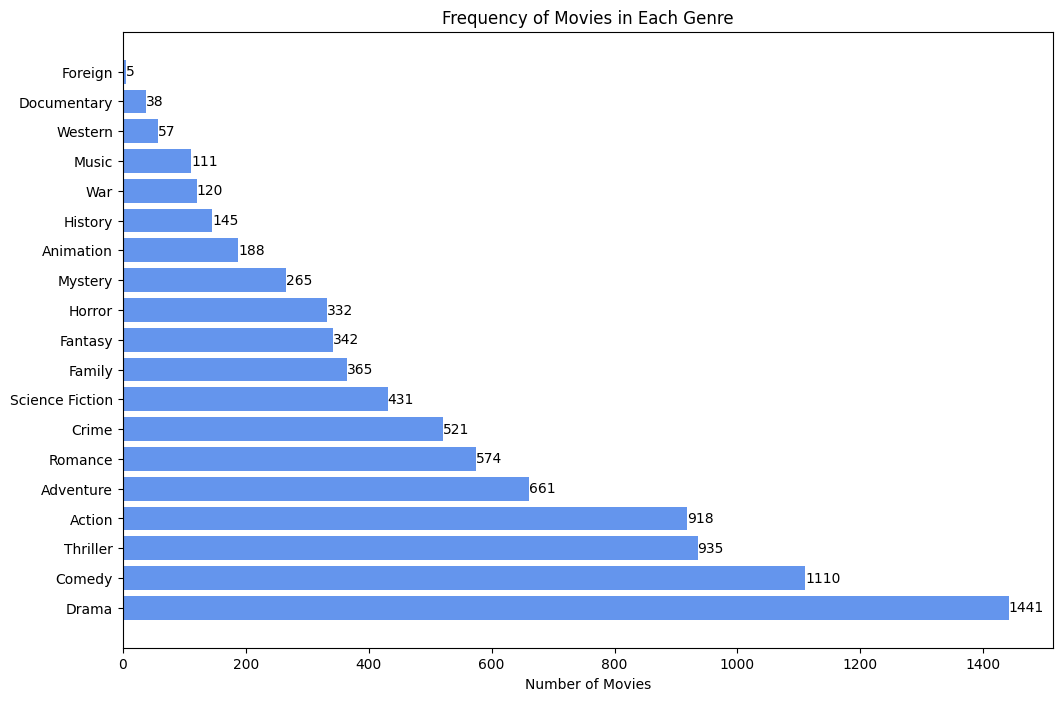

In [202]:
# Split the genre strings into individual genres and count the occurrences
genre_list = []
for genres in movies_df['genres']:
    genre_list.extend(eval(genres))  # Convert string representation of list back to list

# Count the frequency of each genre
genre_counts = Counter(genre_list)

# Convert to DataFrame for easier plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Frequency'])
genre_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Plotting the frequency of each genre
plt.figure(figsize=(12, 8))
bars = plt.barh(genre_df['Genre'], genre_df['Frequency'], color='cornflowerblue')
plt.xlabel('Number of Movies')
plt.title('Frequency of Movies in Each Genre')

# Annotate each bar with the frequency value
for index, value in enumerate(genre_df['Frequency']):
    plt.text(value, index, f'{value}', va='center', ha='left')

# Display the plot
plt.show()


#### 1. Revenue by Genre
Question: Which genres generate the most revenue?

Visualization: A bar chart where the x-axis is the total revenue generated by each genre. This can help identify which genres are the most profitable overall.

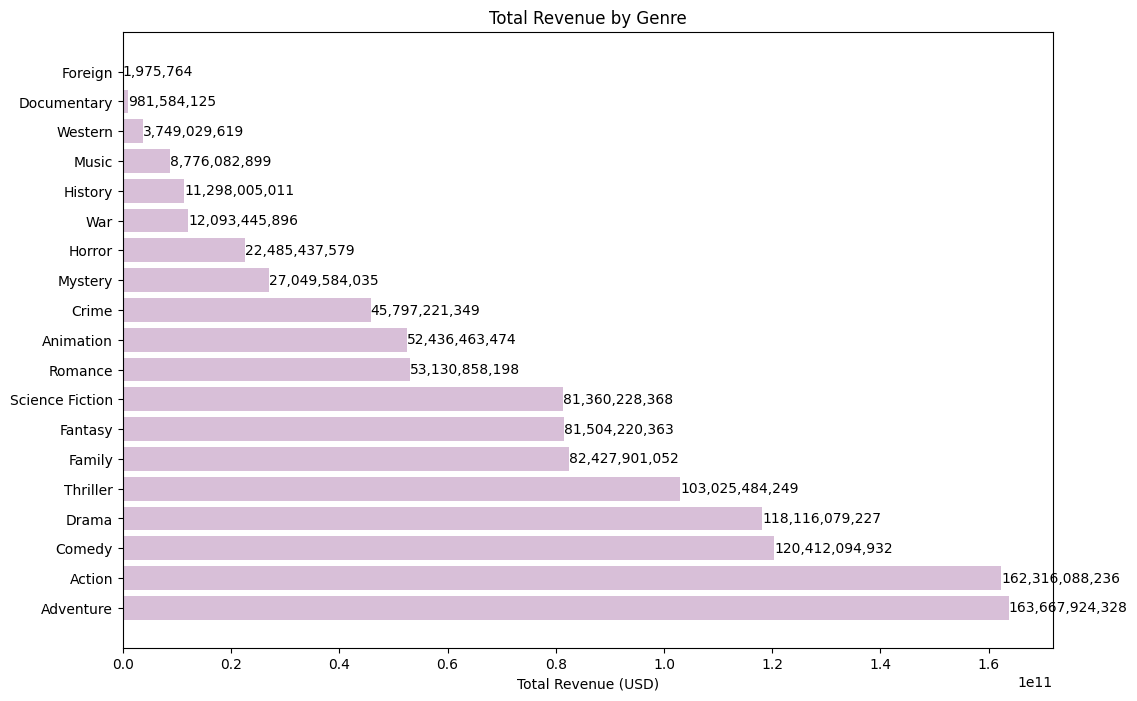

In [207]:
# Initialize a dictionary to hold the total revenue for each genre
genre_revenue = defaultdict(float)

# Iterate through each movie and add the revenue to each genre it belongs to
for genres, revenue in zip(movies_df['genres'], movies_df['revenue']):
    genre_list = eval(genres)  # Convert string representation of list back to list
    for genre in genre_list:
        genre_revenue[genre] += revenue

# Convert the genre_revenue dictionary to a DataFrame for plotting
genre_revenue_df = pd.DataFrame(genre_revenue.items(), columns=['Genre', 'Total_Revenue'])
genre_revenue_df.sort_values(by='Total_Revenue', ascending=False, inplace=True)

# Plotting the total revenue by genre
plt.figure(figsize=(12, 8))
plt.barh(genre_revenue_df['Genre'], genre_revenue_df['Total_Revenue'], color='thistle')
plt.xlabel('Total Revenue (USD)')
plt.title('Total Revenue by Genre')

# Annotate each bar with the total revenue value
for index, value in enumerate(genre_revenue_df['Total_Revenue']):
    plt.text(value, index, f'{value:,.0f}', va='center', ha='left')

# Display the plot
plt.show()

#### 2. Runtime vs revenue


Question: What is the relationship between movie runtime and revenue?

Visualization: A scatter plot that displays the relationship between movie runtime (in minutes) on the x-axis and revenue on the y-axis. The scatter plot will help identify whether longer or shorter movies tend to have higher or lower revenues.

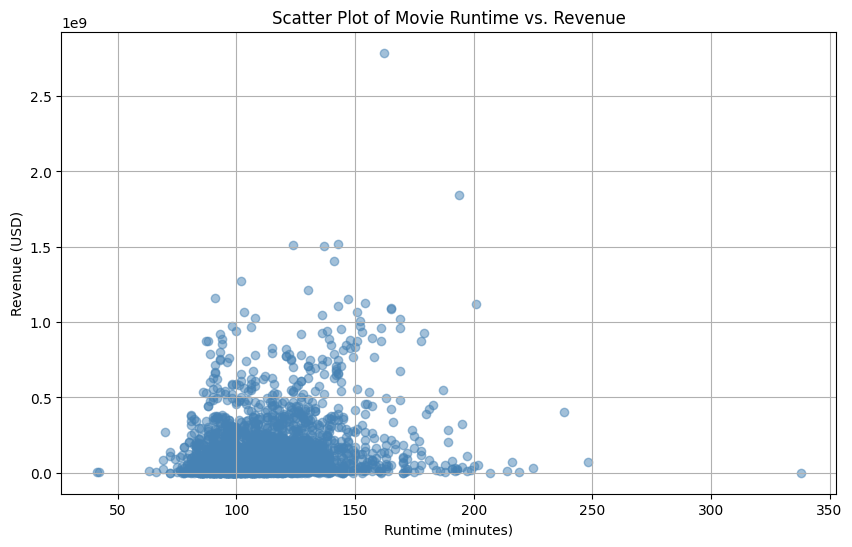

In [204]:
# Create a scatter plot to visualize the correlation between runtime and revenue
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['runtime'], movies_df['revenue'], alpha=0.5, color='steelblue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (USD)')
plt.title('Scatter Plot of Movie Runtime vs. Revenue')
plt.grid(True)
plt.show()


#### 3. Average Revenue by Release Month

Question: Does the month of a movie's release have an impact on its average revenue?

Visualization: A line plot showing the average revenue of movies released in each month. The x-axis represents the release month, and the y-axis shows the average revenue. This visualization helps identify if certain months tend to yield higher revenues, revealing potential seasonal trends in movie performance.

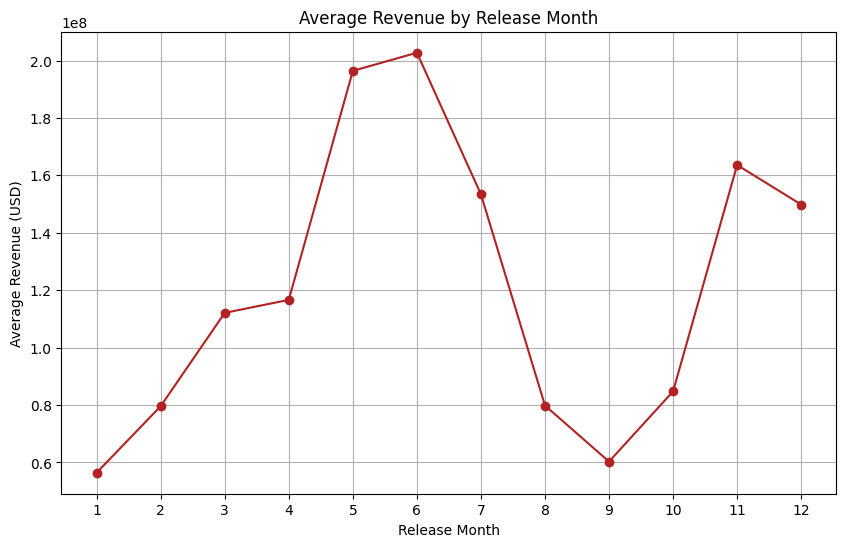

In [205]:
# Extract the month from the 'release_date'
movies_df['release_month'] = movies_df['release_date'].dt.month

# Drop rows with missing or invalid 'release_month' data
movies_df.dropna(subset=['release_month'], inplace=True)

# Calculate the average revenue per month
average_revenue_by_month = movies_df.groupby('release_month')['revenue'].mean().reset_index()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_by_month['release_month'], 
         average_revenue_by_month['revenue'], 
         marker='o', linestyle='-', color='firebrick')
plt.xlabel('Release Month')
plt.ylabel('Average Revenue (USD)')
plt.title('Average Revenue by Release Month')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.show()


# References:

https://stackoverflow.com/questions/56713197/how-to-change-the-xticks-to-a-specific-range

https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/linestyles.html

https://matplotlib.org/stable/api/markers_api.html

https://www.datacamp.com/tutorial/pandas-reset-index-tutorial

https://mkaz.blog/working-with-python/string-formatting

https://www.toppr.com/guides/python-guide/references/methods-and-functions/methods/built-in/eval/python-eval/#:~:text=What%20does%20eval()%20do,to%20the%20built%2Din%20function.

https://www.w3schools.com/python/ref_list_extend.asp

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

https://stackoverflow.com/questions/34087382/matplotlib-center-text-in-its-bbox

https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib

https://www.w3schools.com/python/pandas/ref_df_nsmallest.asp

https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/

https://www.geeksforgeeks.org/pandas-concat-function-in-python/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

https://www.w3schools.com/python/pandas/ref_df_drop.asp#:~:text=The%20drop()%20method%20removes,method%20removes%20the%20specified%20row.

https://stackoverflow.com/questions/43893457/understanding-inplace-true-in-pandas#:~:text=The%20'inplace%3DTrue'%20argument,to%20make%20changes%20permanent%20eg.&text=pandas%20shows%20the%20dataframe%20with,the%20original%20dataframe%20'df'.&text=If%20you%20don't%20use,basically%20get%20back%20a%20copy.

https://stackoverflow.com/questions/15295917/sas-creating-a-dataset-regardless-of-input-dataset#:~:text=Check%20if%20the%20dataset%20exists,if%20the%20first%20one%20exists.

https://www.geeksforgeeks.org/python-collections-module/

https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/

https://matplotlib.org/stable/gallery/color/named_colors.html

https://www.studiobinder.com/blog/production-budget/#:~:text=A%20low%2Dbudget%20movie%20is,be%20characterized%20as%20low%2Dbudget.

https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-to-make.aspx#:~:text=And%20though%20the%20occasional%20independent,has%20been%20around%20%2465%20million.

https://www.digitalocean.com/community/tutorials/python-string-contains

https://www.geeksforgeeks.org/change-numpy-array-data-type/

https://www.geeksforgeeks.org/pandas-series-dt-year/

https://saturncloud.io/blog/how-to-convert-pandas-series-to-datetime-in-a-dataframe/#:~:text=Method%201%3A%20Using%20the%20pd.&text=The%20easiest%20and%20most%20straightforward,Series%20with%20the%20DateTime%20values.

https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/